# Çoklu Doğrusal Regresyon (Multiple Linear Regression) - Alıştırmalar

## ALIŞTIRMA - 1

### Veri Setinin İncelenmesi ve Manüle Edilmesi

In [1]:
# Gerekli kütüpanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

fuelcons = pd.read_csv(url)
df = fuelcons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().values.any() # verisetinde bos eleman var mı?

False

In [4]:
df.info() # verisetinin bilgisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.corr() # aralarındaki korelasyon

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


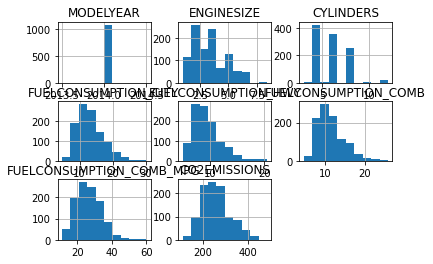

In [6]:
df.hist(); # degiskenlerin dagılımı

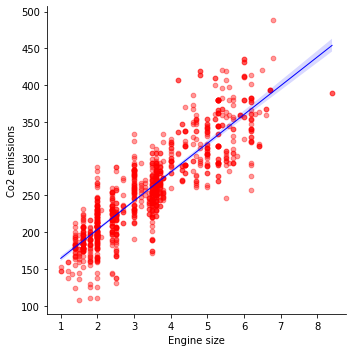

In [7]:
sns.lmplot(x = "ENGINESIZE", y = "CO2EMISSIONS", data = df, scatter_kws = {'s': 22, 'color': 'r', 'alpha':0.4}, line_kws = {'color' : 'blue', 'lw': 1})
plt.xlabel('Engine size')
plt.ylabel('Co2 emissions');

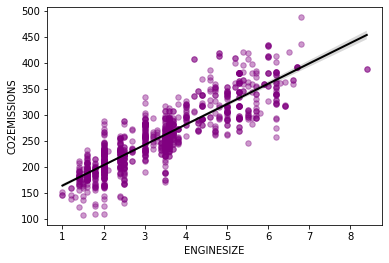

In [8]:
sns.regplot(x = "ENGINESIZE", y = "CO2EMISSIONS", data = df, scatter_kws = {'s': 30, 'color': 'purple', 'alpha':0.4}, line_kws = {'color' : 'k', 'lw': 2});

### Statsmodels İle Modelleme

In [9]:
# bagımısız degiskenler sürekli olmalı
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
y = df['CO2EMISSIONS'] # bagımlı degisken

# model nesnesini olusturulması ve fit edilmesi
X = sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()

# hata degerleri
ypred = model.predict(X)
mse = np.mean((y - ypred) ** 2) # MSE
rmse = np.sqrt(mse) # RMSE
rscore = model.rsquared # r-squared
pvalue = model.f_pvalue # p-value

print(model.summary())
print("***********************************************")
print("Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır): ", pvalue)
print("Modelin basarı yüzdesi (r-squared): ", rscore * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse)
print("Modelin hata degeri (RMSE): ", rmse)
print("Model denkleminin katsayıları: \n", model.params)

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1350.
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:44:22   Log-Likelihood:                -4875.4
No. Observations:                1067   AIC:                             9763.
Df Residuals:                    1061   BIC:                             9793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   66.1478 

In [10]:
# Örnek tahmin,
# enginesize = 2.1, cylinders = 5, fc_city = 9.3, fc_hwy = 6.8, fc_comb = 10.4 olursa co2emission degeri ne olur?

In [11]:
y.head() # y gercek degerleri

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [12]:
model.predict(X)[0:5] # bagımsız degiskenler ile edilen y tahmin degerleri

0    199.756470
1    213.771957
2    166.428350
3    254.902784
4    250.183057
dtype: float64

In [13]:
tahmin = [[1, 2.1, 5, 9.3, 6.8, 10.4]] # sabit degerin katsayı degeri 1 olarak verilmeli!
model.predict(tahmin)

array([255.53670387])

### ScikitLearn İle Modelleme

In [14]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']] # bagımsız degiskenler
y = df[['CO2EMISSIONS']] # bagımlı degisken

# %80 egitim seti, %20 test seti,
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)
# model nesenesinin olsuturulması ve fit edilmesi
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# hata degerleri
ypred = model.predict(X_test)
mse = mean_squared_error(y_test, ypred) # MSE
rmse = np.sqrt(mse) # RMSE
rscore = model.score(X_train, y_train)

print("Modelin basarı yüzdesi (r-squared): ", rscore * 100)
print("Modelin hata kareler ortalaması (MSE): ", mse)
print("Modelin hata degeri (RMSE): ", rmse)
print(f"Model denkleminin degerleri; \n constant = {model.intercept_} \n katsayılar = {model.coef_[0]}")

Modelin basarı yüzdesi (r-squared):  86.06754712260789
Modelin hata kareler ortalaması (MSE):  511.36521872802297
Modelin hata degeri (RMSE):  22.613385830698217
Model denkleminin degerleri; 
 constant = [67.68380015] 
 katsayılar = [11.24245948  7.01602813 -8.28459694 -7.5814794  25.26626471]


In [15]:
# Örnek tahmin,
# enginesize = 2.1, cylinders = 5, fc_city = 9.3, fc_hwy = 6.8, fc_comb = 10.4 olursa co2emission degeri ne olur?

In [16]:
y.head() # gercek y degerleri

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [17]:
ypred[0:5] # tahmin y degerleri

array([[303.73610032],
       [240.44952949],
       [273.50695152],
       [236.27428387],
       [204.81244243]])

In [18]:
tahmin = [[2.1, 5, 9.3, 6.8, 10.4]] # sabit degerin katsayı degeri 1 olarak verilmeli!
model.predict(tahmin)

array([[260.54144725]])

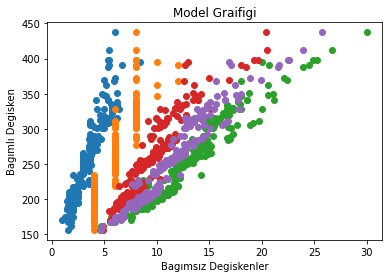

In [19]:
# Görsellestirme
plt.scatter(X_test['ENGINESIZE'], ypred)
plt.scatter(X_test['CYLINDERS'], ypred)
plt.scatter(X_test['FUELCONSUMPTION_CITY'], ypred)
plt.scatter(X_test['FUELCONSUMPTION_HWY'], ypred)
plt.scatter(X_test['FUELCONSUMPTION_COMB'], ypred)
plt.xlabel('Bagımsız Degiskenler')
plt.ylabel('Bagımlı Degisken')
plt.title('Model Graifigi');

#### Model Tuning / Model Dogrulama

In [20]:
# cross validation
rscore_cv = cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean()
rmse_cv = np.sqrt(-cross_val_score(model, X_test, y_test, cv = 10, scoring = "neg_mean_squared_error")).mean()

print("Valide edilmis modelin basarı yüzdesi: ", rscore_cv * 100)
print("Valide edilmis modelin hata degeri: ", rmse_cv)

Valide edilmis modelin basarı yüzdesi:  85.58275368456071
Valide edilmis modelin hata degeri:  23.035879133825702


### Sonuç

* Statsmodels ile elde edilen degerler;
    * Modelin anlamlılıgı (p-value < 0.05 ise anlamlıdır):  0.0
    * Modelin basarı yüzdesi (r-squared):  **86.41751789540444**
    * Modelin hata kareler ortalaması (MSE):  544.9679057866376
    * Modelin hata degeri (RMSE):  **23.34454766720995**
    * Model denkleminin katsayıları: 
        * const                   66.147827
        * ENGINESIZE              10.918179
        * CYLINDERS                7.201397
        * FUELCONSUMPTION_CITY    -6.690605
        * FUELCONSUMPTION_HWY     -7.241631
        * FUELCONSUMPTION_COMB    23.261483
* ScikitLearn (egitim ve test seti üzerinde) ile elde edilen degerler;
    * Modelin basarı yüzdesi (r-squared):  **86.06754712260789**
    * Modelin hata kareler ortalaması (MSE):  511.36521872802297
    * Modelin hata degeri (RMSE):  **22.613385830698217**
    * Model denkleminin degerleri: 
        * constant = [67.68380015] 
        * katsayılar = [11.24245948  7.01602813 -8.28459694 -7.5814794  25.26626471]
    * Valide edilmis modelin basarı yüzdesi:  **85.58275368456071**
    * Valide edilmis modelin hata degeri:  **23.035879133825702**